<a href="https://colab.research.google.com/github/srinivasanibmbangalore/OpenCVDeepLearningCertification/blob/master/Sobel_Laplacian_ImageGradients_CannyEdgeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Gradients are calculated on the Gray Scale Image
2.Depth Parameter must be float since gradients can take minimum and negative value as well.
3.Values from Sobel Filters need to be normalized.
4.Derivative Operation Amplifies Noise. Hence they have to be blurred.Hence before applying derivative (gradient operations), images are blurred (smoothed)

In [1]:
import argparse
import os
import shutil
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm

In [24]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = '/content/gdrive/My Drive/ml_data/OpenCVCertification/images'
imgPath=root_path+"/sudoku.png"
akPath=root_path+"/arvind_krishna.jpg"
blurImgPath=root_path+"/blur_image.jpg"



matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [26]:
img = cv2.imread(imgPath,1)
if (img.any() == None):
  print("Empty Image")

akImg=cv2.imread(akPath,1)
if (akImg.any() == None):
  print("Empty Image")

blurImg=cv2.imread(blurImgPath,1)
if (blurImg.any() == None):
  print("Empty Image")

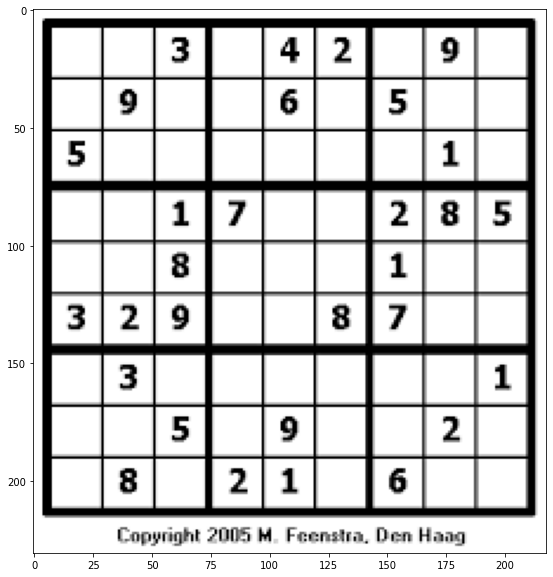

In [5]:
plt.imshow(img)

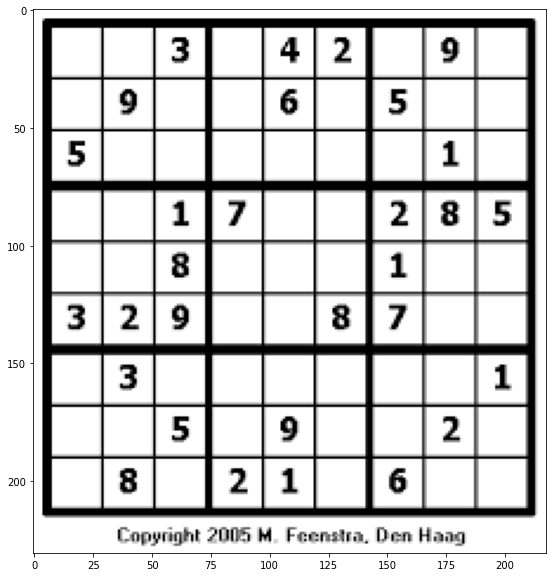

In [6]:
# Convery to GrayScale
bkgrndImg=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(bkgrndImg)

To make gradient calculations even more robust and noisefree, the image can be Gaussian-blurred slightly before applying a gradient filter. As you know, blurring is also a convolution operation. So applying a Gaussian blur filter before applying the gradient filter would require two convolution operations.

Wouldn’t it be cool if we could use just one convolution operation that would implicitly blur and then calculate the gradient operations? We are in luck! Convolution is associative. Therefore, it is possible to combine the two convolution operations into one.

This where the Sobel Filters come in. They perform Gaussian smoothing implicitly. The Sobel filters for X Gradient and Y Gradient calculations are shown below.

In [7]:
# Apply sobel filter along x direction
sobelx = cv2.Sobel(bkgrndImg, cv2.CV_32F, 1, 0)  # 1 indicates X Direction
# Apply sobel filter along y direction
sobely = cv2.Sobel(bkgrndImg,cv2.CV_32F,0,1) # 1 here indicates Y Direction

In [8]:
# Normalize image for display
# Image Intensity Values are normalized between 0 and 1. Interpolation is at work. Max is 1.
# The type of Normalization is MinMax Normalization. 
# Data Type is Float32
cv2.normalize(sobelx, 
                dst = sobelx, 
                alpha = 0, 
                beta = 1, 
                norm_type = cv2.NORM_MINMAX, 
                dtype = cv2.CV_32F)
cv2.normalize(sobely, 
                dst = sobely, 
                alpha = 0, 
                beta = 1, 
                norm_type = cv2.NORM_MINMAX, 
                dtype = cv2.CV_32F)

array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       ...,
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]], dtype=float32)

Text(0.5, 1.0, 'Sobel Y Gradients')

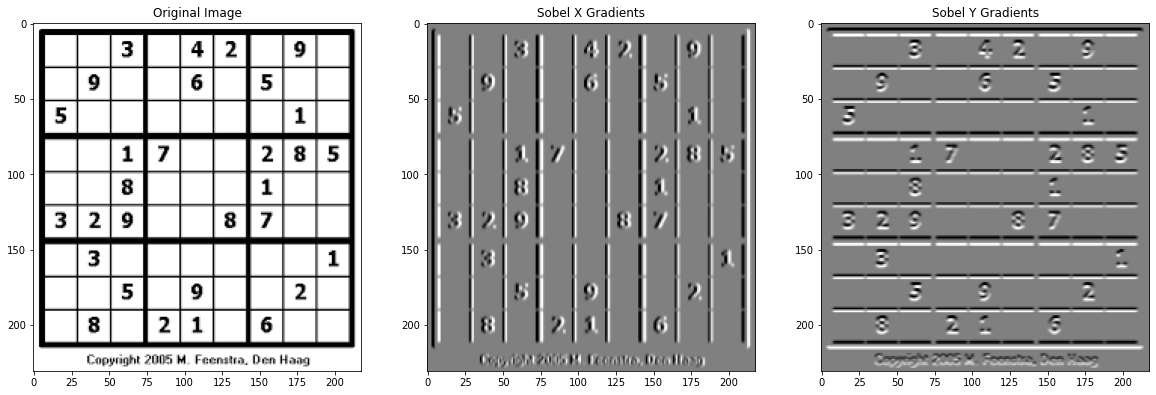

In [10]:
plt.figure(figsize=[20,10])
plt.subplot(131);plt.imshow(bkgrndImg, cmap='gray');plt.title("Original Image")
plt.subplot(132);plt.imshow(sobelx, cmap='gray');plt.title("Sobel X Gradients")
plt.subplot(133);plt.imshow(sobely, cmap='gray');plt.title("Sobel Y Gradients")

## Second Order Derivative - Laplacian

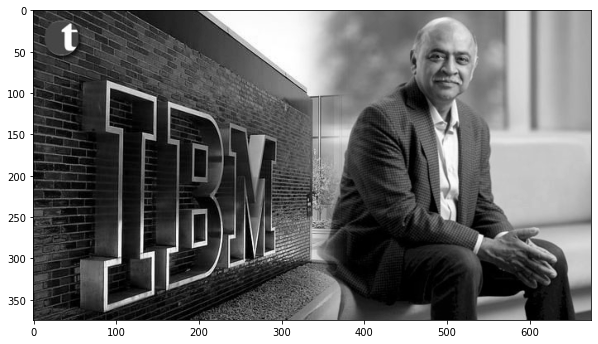

In [16]:
akGrayImg=cv2.cvtColor(akImg, cv2.COLOR_BGR2GRAY)
plt.imshow(akGrayImg)

Text(0.5, 1.0, 'Laplacian')

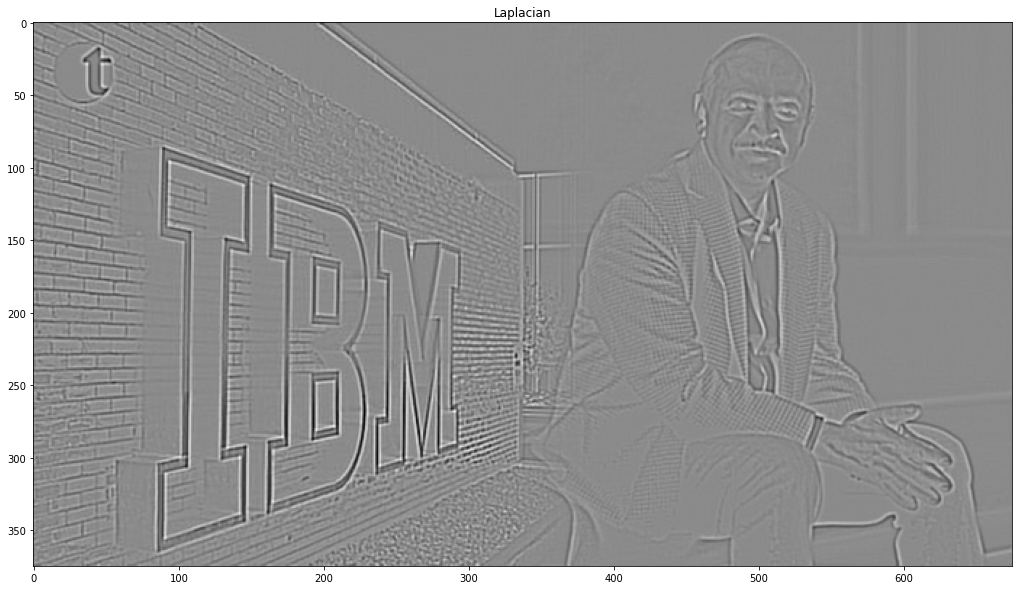

In [17]:
kernelSize = 3
img1 = cv2.GaussianBlur(akGrayImg,(3,3),0,0)
laplacian = cv2.Laplacian(img1, cv2.CV_32F, ksize = kernelSize, 
                            scale = 1, delta = 0)
# Normalize results
cv2.normalize(laplacian, 
                dst = laplacian, 
                alpha = 0, 
                beta = 1, 
                norm_type = cv2.NORM_MINMAX, 
                dtype = cv2.CV_32F)
plt.figure(figsize=[20,10])
plt.imshow(laplacian,cmap='gray');plt.title("Laplacian")

You can easily make out the edges from the above laplacian image.

***Image Sharpening***
Step 1: Blur the image to smooth out texture. The blurred image contains low frequency information of the original image. Let I be the original image and Ib be the blurred image.

Step 2: Obtain the high frequency information of the original image by subtracting the blurred image from the original image.

Step 3: Now, put back the high frequency information back in the image and control the amount using a parameter. The final sharpened image is therefore,

Is=I+α(I−Ib)

Below is the Sharpening Kernel

\\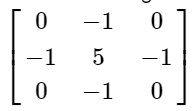

In [27]:
# Sharpen kernel
sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]), dtype="int")

Text(0.5, 1.0, 'Sharpening Result')

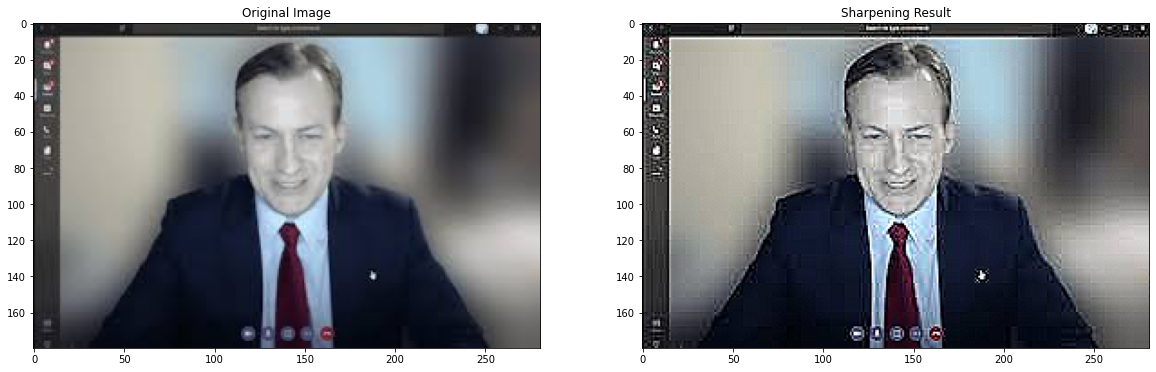

In [28]:
# Using 2D filter by applying the sharpening kernel
sharpenOutput = cv2.filter2D(blurImg, -1, sharpen)

plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(blurImg[...,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(sharpenOutput[...,::-1]);plt.title("Sharpening Result")

Edges are pixels in which there is an abrupt change in 
gradient. Images have to be converted to grayscale

Smooth the image using Gaussian Kernel. Apply Sobel Operators (x and Y) to find X and Y Gradient and then normalize. FInd magnitude of gradient.

Edges are not sharp in real life. Edge has to be one pixel thick 
Non Max Supression tends to suppress the non max gradient pixel
Check along the gradient of Pixel for maximum gradient

Hysteresis Thresholding
**bold text**

If low threshold is increased, broken lines tend to grow or extend along edges. If you increase low threshold, lines tend to grow broken.
As you increase the blur, less edges are visible, but they are nice and continous.
Increasing the high threshold increases the edge

Increasing Kernel Size of Sobel Operator increases more edges
Increasing blur -less edge but noise is filtered out
Decreasing lower threshold help in connecting broken edges



Canny edge detection has the following three steps:

Gradient calculations: Edges are pixels where intensity changes abruptly. From previous modules, we know that the magnitude of gradient is very high at edge pixels. Therefore, gradient calculation is the first step in Canny edge detection.

Non-maxima suppression: In the real world, the edges in an image are not sharp. The magnitude of gradient is very high not only at the real edge location, but also in a small neighborhood around it. Ideally, we want an edge to be represented by a single, pixel-thin contour. Simply thresholding the gradient leads to a fat contour that is several pixels thick. Fortunately, this problem can be eliminated by selecting the pixel with maximum gradient magnitude in a small neighborhood (say 3x3 neighborhood) of every pixel in the gradient image. The name non-maxima suppression comes from the fact that we eliminate (i.e. set to zero) all gradients except the maximum one in small 3x3 neighborhoods over the entire image.

Hysteresis thresholding: After non-maxima suppression, we could threshold the gradient image to obtain a new binary image which is black in all places except for pixels where the gradient is very high. This kind of thresholding would naively exclude a lot of edges because, in real world images, edges tend to fade in and out along their length. For example, an edge may be strong in the middle but fade out at the two ends. To fix this problem, Canny edge detection uses two thresholds. First, a higher threshold is used to select pixels with very high gradients. We say these pixels have a strong edge. Second, a lower threshold is used to obtain new pixels that are potential edge pixels. We say these pixels have a weak edge. A weak edge pixel can be re-classified as a strong edge if one of its neighbor is a strong edge. The weak edges that are not reclassified as strong are dropped from the final edge map.

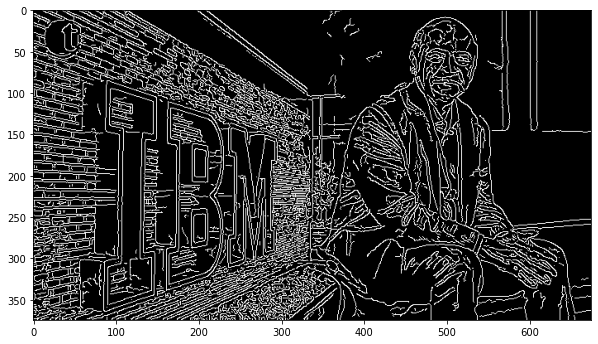

In [42]:
lowThreshold = 20
highThreshold = 50

maxThreshold = 1000

apertureSize = 3 # Kernel Size of Sobel Operator
maxapertureIndex = 2
apertureIndex = 0

blurAmount = 2
maxBlurAmount = 20
blurredSrc = cv2.GaussianBlur(akGrayImg, (2 * blurAmount + 1, 2 * blurAmount + 1), 0)
edges = cv2.Canny(blurredSrc,lowThreshold,highThreshold, apertureSize = apertureSize)

plt.imshow(edges)